### Near surface linear tracer concetration anomalies (Barkleys, Astorias and Original)
Note that the linear tracer is nitrate-like for oroginal canyon and salinity-like for Barkley-ish and Astoria-ish canyons.

Main points:
* There is not much surface impact when the profile is linear. Least of all for Barkley bathymetry (the canyon is tiny and shelf-break depth is 200 m vs 150 from Astoria.)
* Nitrate profile - there is a surface signal for both Barkley and Astoria but Astoria's is much stronger. The anomaly is advected downstream.

* The near-surface impact depends on the gradient near the surface and the size of the canyon? Also, how deep is the shelf-break. A function of Dh?

ADD TIME SERIES

In [1]:
import cmocean as cmo
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import numpy as np
import seaborn as sns
import canyon_tools.readout_tools as rout
import canyon_tools.savitzky_golay as sg

import matplotlib.gridspec as gspec

/home/kramosmu/anaconda3/lib/python3.5/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [3]:
sns.set_context('notebook')
sns.set_style('whitegrid')

Text(0,0.5,'Depth / m')

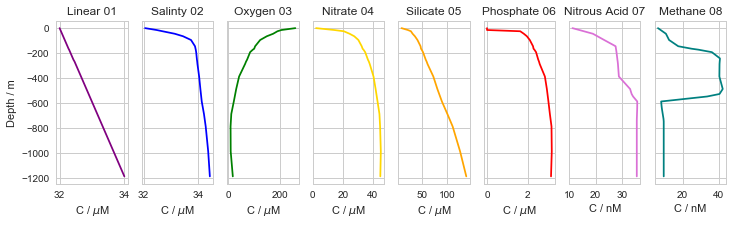

In [22]:
ptracers_file = '/data/kramosmu/results/TracerExperiments/UPWELLING_8TR/03_Bar/ptracersGlob.nc'
grid_file = '/data/kramosmu/results/TracerExperiments/UPWELLING_8TR/03_Bar/gridGlob.nc'
tracers = ['Tr01','Tr02','Tr03','Tr04','Tr05','Tr06','Tr07','Tr08']
labels = ['Linear 01','Salinty 02','Oxygen 03','Nitrate 04','Silicate 05','Phosphate 06','Nitrous Acid 07','Methane 08']
colours = ['purple','blue','green','gold','orange','red','orchid','teal']

with Dataset(grid_file, 'r') as grd:
    RC = grd.variables['RC'][:]

fig,ax = plt.subplots(1,len(tracers),figsize=(12,3), sharey = True)
    
for ii, trac, col, lab in zip(range(len(tracers)),tracers , colours, labels):
    with Dataset(ptracers_file, 'r') as nbl:
        tr_profile = nbl.variables[trac][0,:,50,180]
        
    ax[ii].plot(tr_profile, RC, color=col, label=lab)
    ax[ii].set_title(lab)
    if (trac == 'Tr07' or trac == 'Tr08'):
        ax[ii].set_xlabel('C / nM')
    else:
        ax[ii].set_xlabel(r'C / $\mu$M')

ax[0].set_ylabel('Depth / m')        

In [4]:
def getTracers(ptracers_file, ptracers_fileNoC,trac, xslice, yslice, zslice, tt):
    
    with Dataset(ptracers_file, 'r') as nbl:
        with Dataset(ptracers_fileNoC, 'r') as nc:
            trNoC = np.mean(nc.variables[trac][tt,zslice,yslice,xslice], axis=0)
            tr = np.mean(nbl.variables[trac][tt,zslice,yslice,xslice], axis=0)
            tr0NoC = np.mean(nc.variables[trac][0,zslice,yslice,xslice], axis=0)
    
    return (tr, trNoC, tr0NoC)


In [34]:
def plotSurf(xslice, yslice, tr, trNoC, tr0NoC, tt, vmax=18, vmin=2, shelf_dep=150.0):
    fig,(ax0, ax1) = plt.subplots(1,2, figsize=(14,2.3), sharey=True)

    cf0 = ax0.contourf(X[xslice],Y[yslice],tr, vmax=vmax, vmin=vmin,cmap = cmo.cm.dense)
    plt.colorbar(cf0, ax=ax0)
    
    cf1 = ax1.contourf(X[xslice],Y[yslice],(tr-trNoC)/tr0NoC, cmap = cmo.cm.balance, vmax=1, vmin=-1)
    plt.colorbar(cf1, ax=ax1)
    
    cs0 = ax0.contour(X[xslice],Y[yslice],Depth[yslice,xslice],levels=[50,shelf_dep], colors='w')
    cs1 = ax1.contour(X[xslice],Y[yslice],Depth[yslice,xslice],levels=[50,shelf_dep], colors='k')
    plt.clabel(cs0, fmt='%1.0f')
    plt.clabel(cs1, fmt='%1.0f')

    ax0.set_title('day %1.1f' %(tt/2))
    ax0.set_aspect(1)
    ax1.set_aspect(1)
    
    return(ax0, ax1, )


Left column: Mean top 20 m concetration

Right column: Mean top 20 m concetration normalized anomaly 
$$C_{anom}(t) = \frac{C_{cny}(t)-C_{noCny}(t)}{C_{noCny}(t=0)}$$

### Canyon Paper 1

In [23]:
grid_file = '/data/kramosmu/results/TracerExperiments/CNTDIFF/run38/gridGlob.nc'
grid_fileNoC = '/data/kramosmu/results/TracerExperiments/CNTDIFF/run42/gridGlob.nc'
state_file = '/data/kramosmu/results/TracerExperiments/CNTDIFF/run38/stateGlob.nc' 
ptracers_file = '/data/kramosmu/results/TracerExperiments/CNTDIFF/run38/ptracersGlob.nc'
ptracers_fileNoC = '/data/kramosmu/results/TracerExperiments/CNTDIFF/run42/ptracersGlob.nc'

with Dataset(grid_file, 'r') as nbl:
    Z = nbl.variables['RC'][:]
    X = nbl.variables['X'][:]
    Y = nbl.variables['Y'][:]
    Depth = nbl.variables['Depth'][:]

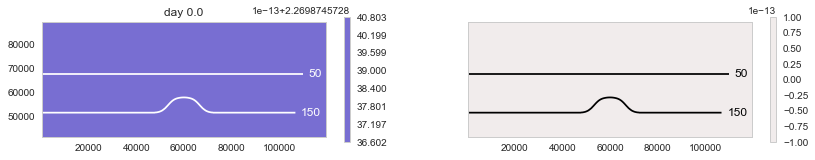

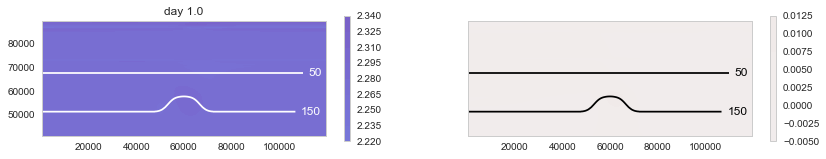

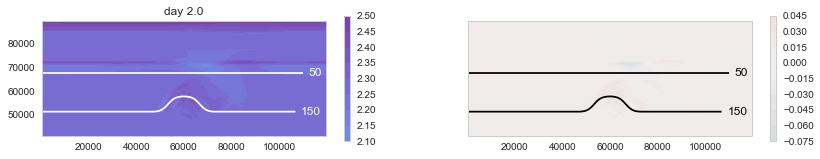

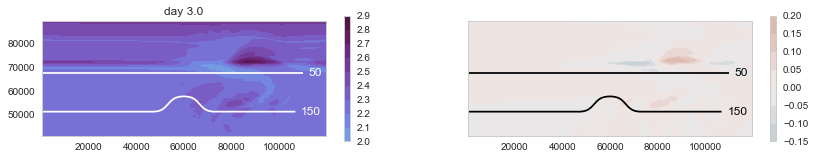

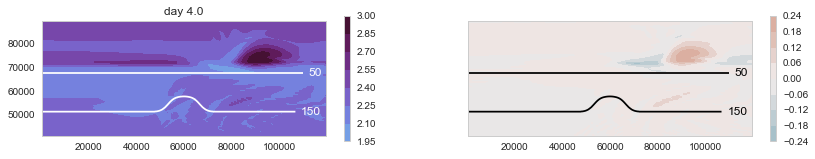

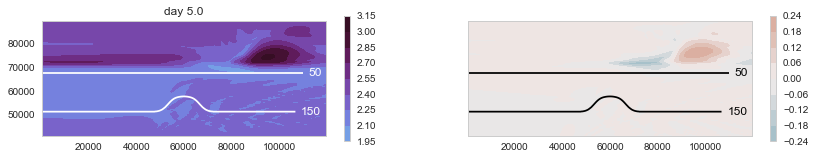

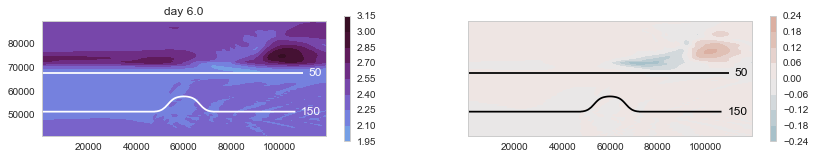

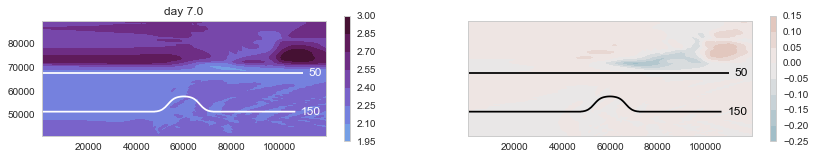

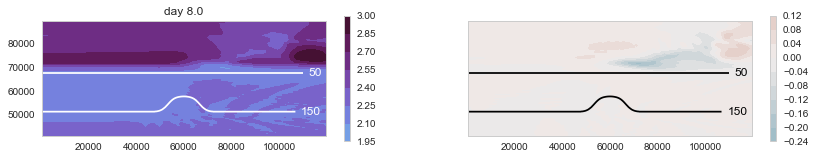

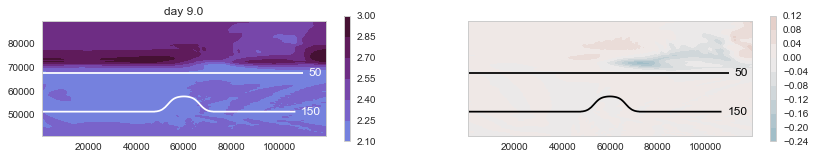

In [24]:
trac = 'Tr1'

zslice = slice(0,4)
yslice = slice(150,359)
xslice = slice(0,360)

for tt in range(0,19,2):
    tr, trNoC, tr0NoC = getTracers(ptracers_file, ptracers_fileNoC,trac, xslice, yslice, zslice, tt)
    ax0, ax1 = plotSurf(xslice, yslice, tr, trNoC, tr0NoC, tt, vmax=3, vmin=1.5)


### Astoria 01 - Linear

In [25]:
grid_file = '/data/kramosmu/results/TracerExperiments/UPWELLING_8TR/01_Ast/gridGlob.nc'
grid_fileNoC = '/data/kramosmu/results/TracerExperiments/UPWELLING_8TR/02_Ast_No_Cny/gridGlob.nc'
state_file = '/data/kramosmu/results/TracerExperiments/UPWELLING_8TR/01_Ast/stateGlob.nc' 
ptracers_file = '/data/kramosmu/results/TracerExperiments/UPWELLING_8TR/01_Ast/ptracersGlob.nc'
ptracers_fileNoC = '/data/kramosmu/results/TracerExperiments/UPWELLING_8TR/02_Ast_No_Cny/ptracersGlob.nc'

with Dataset(grid_file, 'r') as nbl:
    Z = nbl.variables['RC'][:]
    X = nbl.variables['X'][:]
    Y = nbl.variables['Y'][:]
    Depth = nbl.variables['Depth'][:]

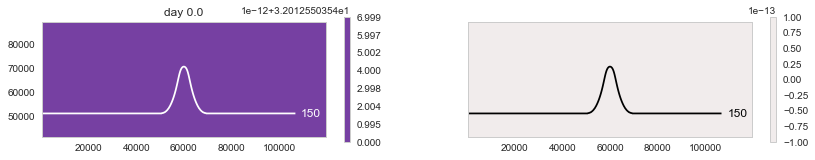

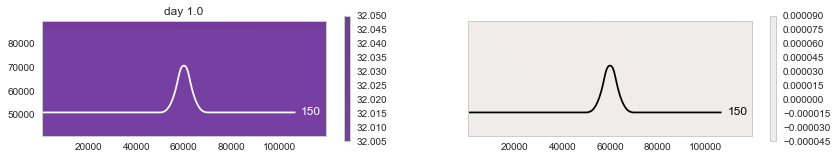

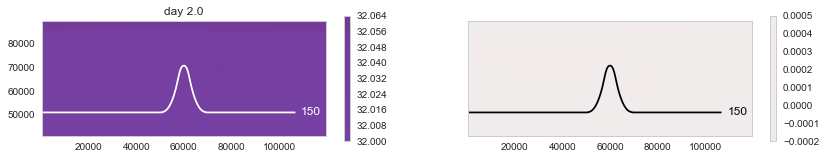

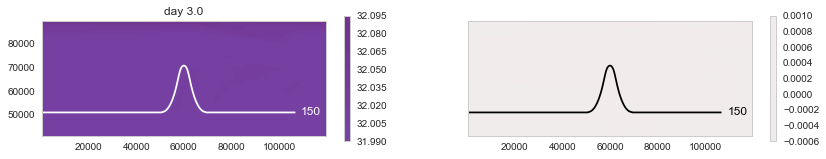

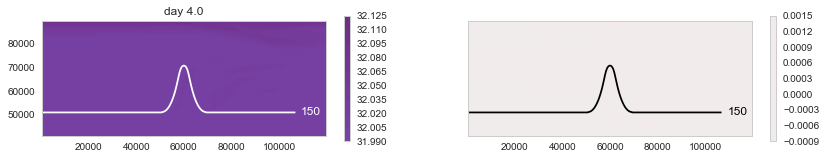

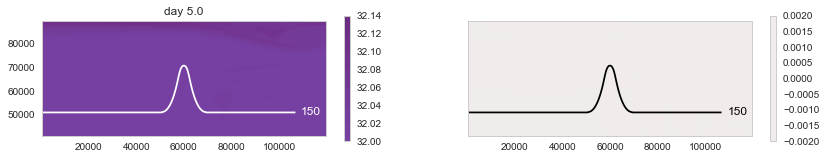

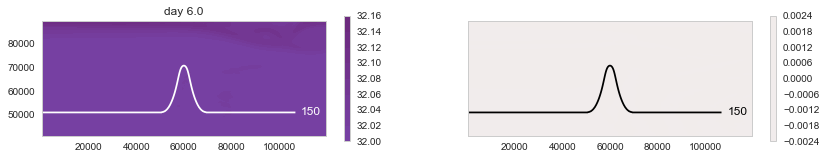

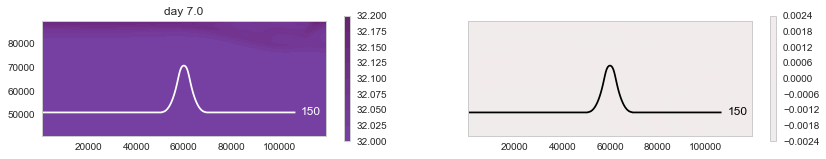

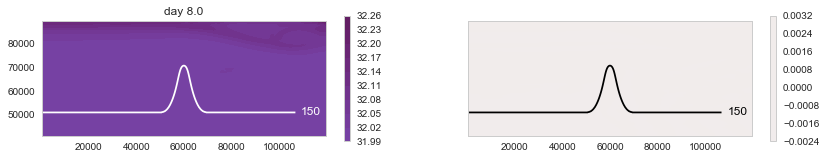

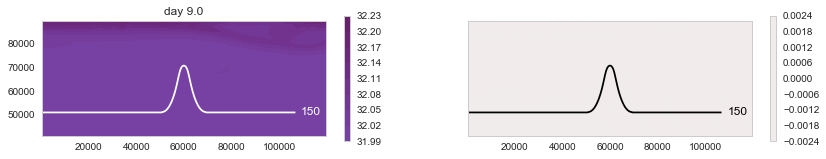

In [28]:
trac = 'Tr01'
zslice = slice(0,4)
yslice = slice(150,359)
xslice = slice(0,360)

for tt in range(0,19,2):
    tr, trNoC, tr0NoC = getTracers(ptracers_file, ptracers_fileNoC,trac, xslice, yslice, zslice, tt)
    ax0, ax1 = plotSurf(xslice, yslice, tr, trNoC, tr0NoC, tt, vmax=32.5, vmin=31)


### Astroria 02- Linear

In [30]:
grid_file = '/data/kramosmu/results/TracerExperiments/UPWELLING_8TR/05_Ast02/gridGlob.nc'
grid_fileNoC = '/data/kramosmu/results/TracerExperiments/UPWELLING_8TR/06_Ast02_No_Cny/gridGlob.nc'
state_file = '/data/kramosmu/results/TracerExperiments/UPWELLING_8TR/05_Ast02/stateGlob.nc' 
ptracers_file = '/data/kramosmu/results/TracerExperiments/UPWELLING_8TR/05_Ast02/ptracersGlob.nc'
ptracers_fileNoC = '/data/kramosmu/results/TracerExperiments/UPWELLING_8TR/06_Ast02_No_Cny/ptracersGlob.nc'

with Dataset(grid_file, 'r') as nbl:
    Z = nbl.variables['RC'][:]
    X = nbl.variables['X'][:]
    Y = nbl.variables['Y'][:]
    Depth = nbl.variables['Depth'][:]

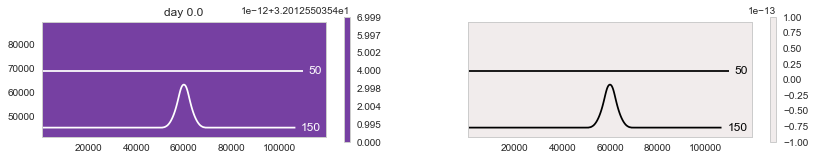

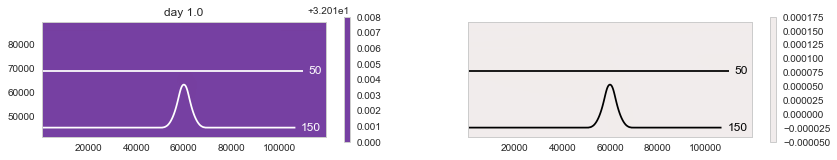

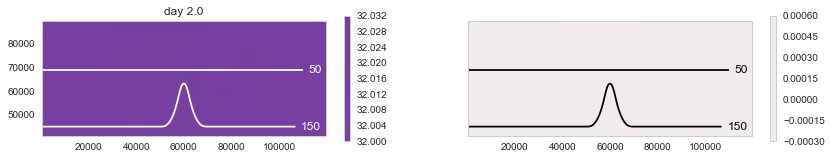

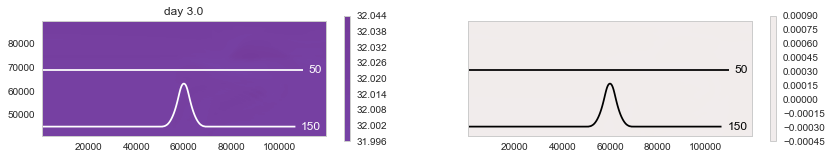

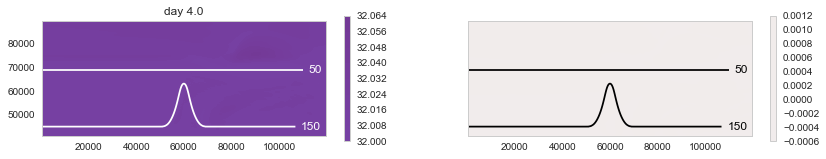

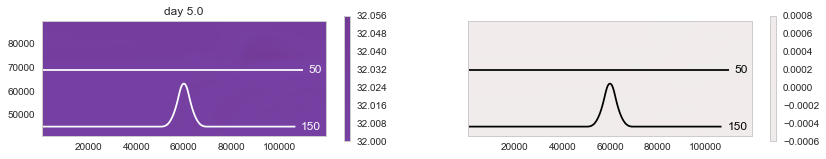

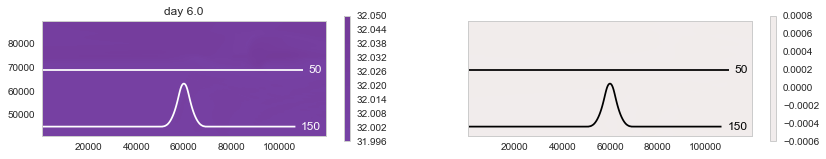

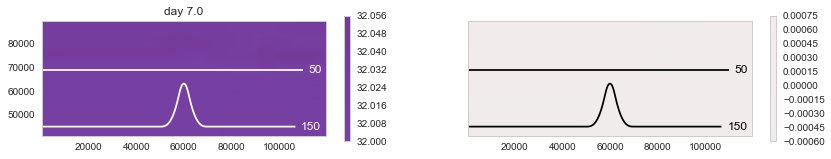

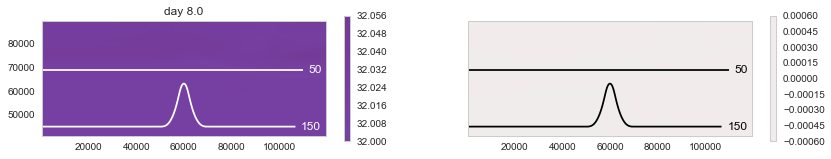

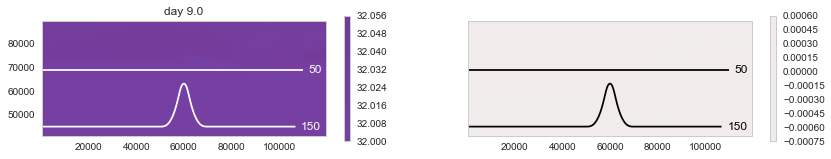

In [44]:
trac = 'Tr01'
zslice = slice(0,4)
yslice = slice(150,359)
xslice = slice(0,360)

for tt in range(0,19,2):
    tr, trNoC, tr0NoC = getTracers(ptracers_file, ptracers_fileNoC,trac, xslice, yslice, zslice, tt)
    ax0, ax1 = plotSurf(xslice, yslice, tr, trNoC, tr0NoC, tt, vmax=32.5, vmin=31)


### Astroria 02- Nitrate

In [42]:
grid_file = '/data/kramosmu/results/TracerExperiments/UPWELLING_8TR/05_Ast02/gridGlob.nc'
grid_fileNoC = '/data/kramosmu/results/TracerExperiments/UPWELLING_8TR/06_Ast02_No_Cny/gridGlob.nc'
state_file = '/data/kramosmu/results/TracerExperiments/UPWELLING_8TR/05_Ast02/stateGlob.nc' 
ptracers_file = '/data/kramosmu/results/TracerExperiments/UPWELLING_8TR/05_Ast02/ptracersGlob.nc'
ptracers_fileNoC = '/data/kramosmu/results/TracerExperiments/UPWELLING_8TR/06_Ast02_No_Cny/ptracersGlob.nc'

with Dataset(grid_file, 'r') as nbl:
    Z = nbl.variables['RC'][:]
    X = nbl.variables['X'][:]
    Y = nbl.variables['Y'][:]
    Depth = nbl.variables['Depth'][:]

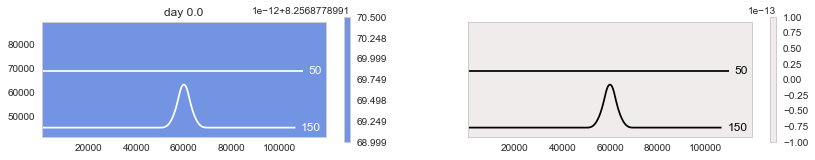

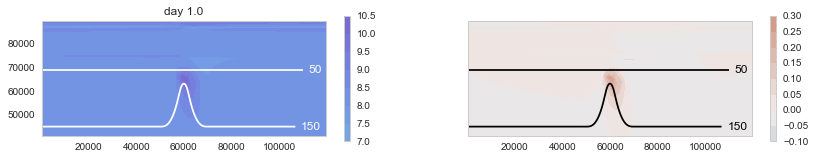

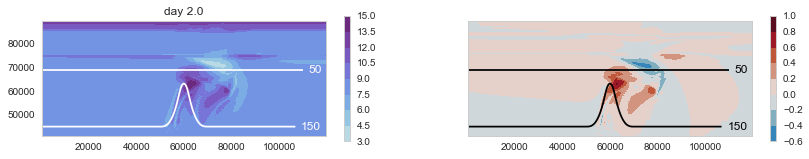

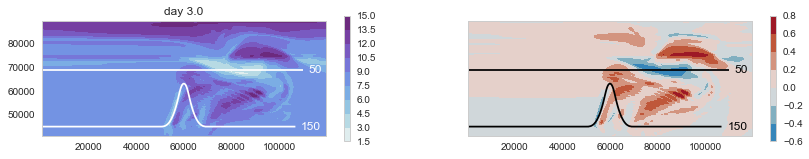

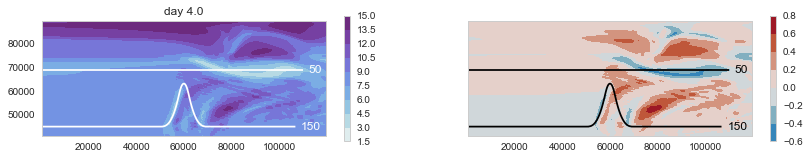

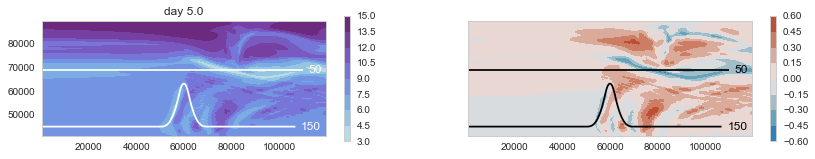

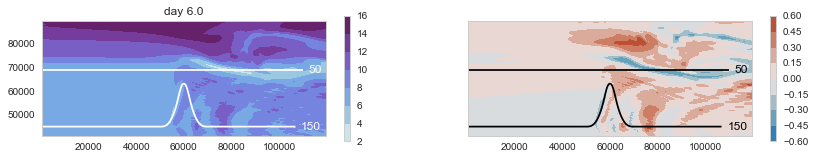

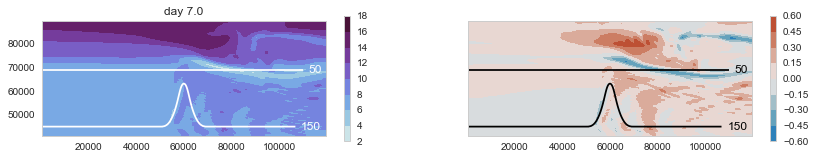

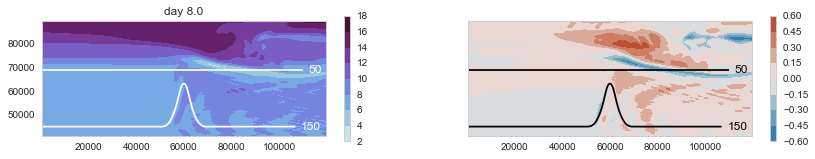

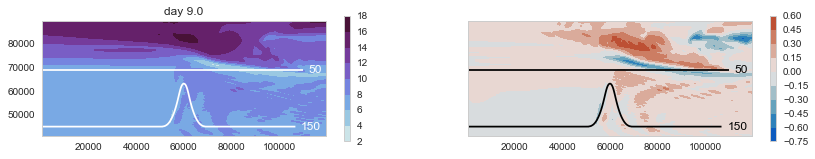

In [43]:
trac = 'Tr04'
zslice = slice(0,4)
yslice = slice(150,359)
xslice = slice(0,360)

for tt in range(0,19,2):
    tr, trNoC, tr0NoC = getTracers(ptracers_file, ptracers_fileNoC,trac, xslice, yslice, zslice, tt)
    ax0, ax1 = plotSurf(xslice, yslice, tr, trNoC, tr0NoC, tt, vmax=18, vmin=2)


### Barkley 02- Nitrate

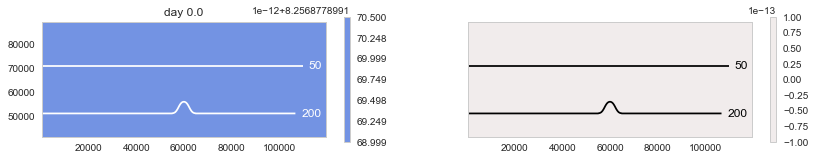

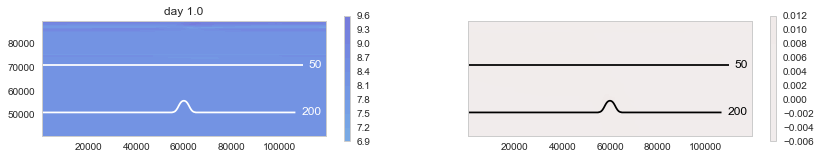

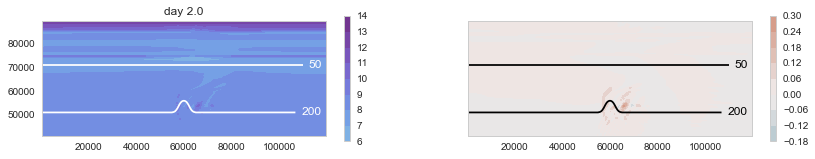

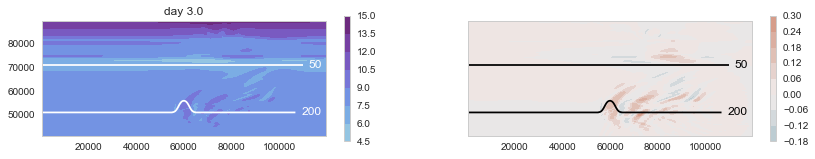

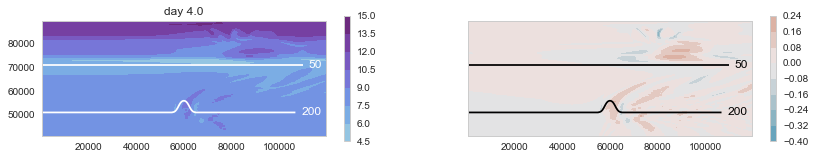

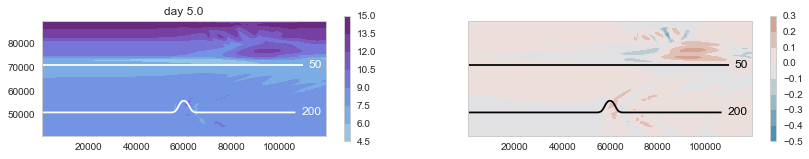

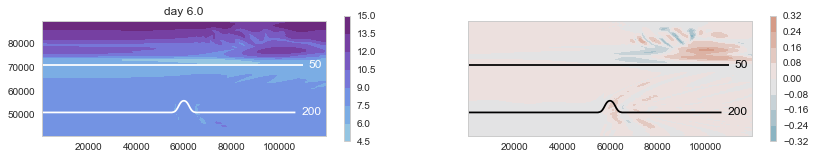

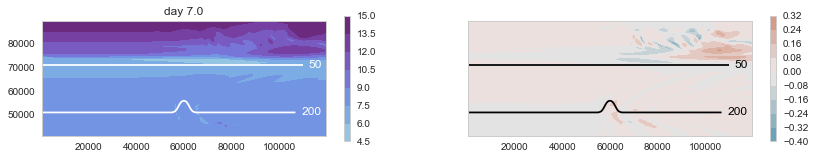

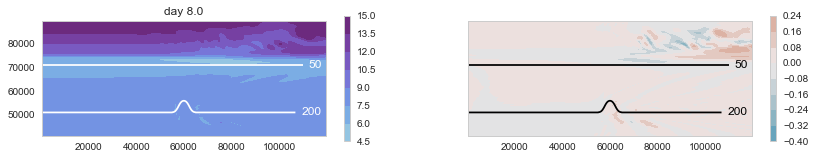

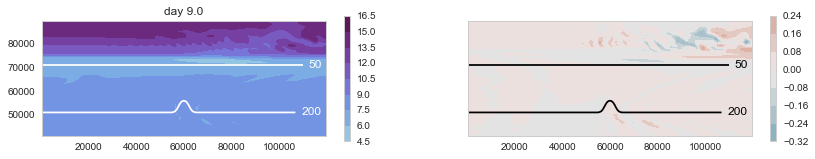

In [45]:
grid_file = '/data/kramosmu/results/TracerExperiments/UPWELLING_8TR/07_Bar02/gridGlob.nc'
grid_fileNoC = '/data/kramosmu/results/TracerExperiments/UPWELLING_8TR/08_Bar02_No_Cny/gridGlob.nc'
state_file = '/data/kramosmu/results/TracerExperiments/UPWELLING_8TR/07_Bar02/stateGlob.nc' 
ptracers_file = '/data/kramosmu/results/TracerExperiments/UPWELLING_8TR/07_Bar02/ptracersGlob.nc'
ptracers_fileNoC = '/data/kramosmu/results/TracerExperiments/UPWELLING_8TR/08_Bar02_No_Cny/ptracersGlob.nc'

with Dataset(grid_file, 'r') as nbl:
    Z = nbl.variables['RC'][:]
    X = nbl.variables['X'][:]
    Y = nbl.variables['Y'][:]
    Depth = nbl.variables['Depth'][:]
    
trac = 'Tr04'
zslice = slice(0,4)
yslice = slice(150,359)
xslice = slice(0,360)

for tt in range(0,19,2):
    tr, trNoC, tr0NoC = getTracers(ptracers_file, ptracers_fileNoC,trac, xslice, yslice, zslice, tt)
    ax0, ax1 = plotSurf(xslice, yslice, tr, trNoC, tr0NoC, tt, vmax=18, vmin=2, shelf_dep=200.0)


### Astoria02 - Methane

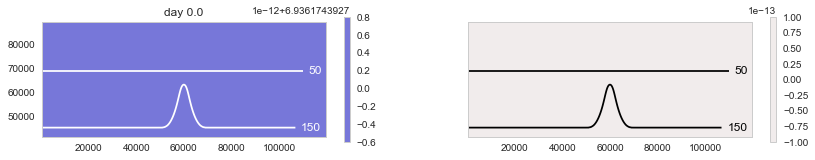

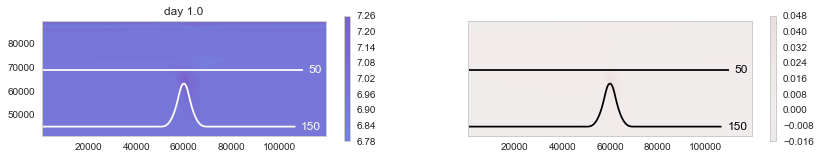

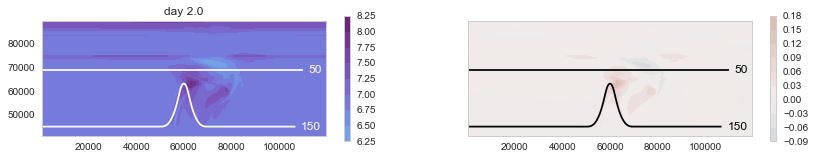

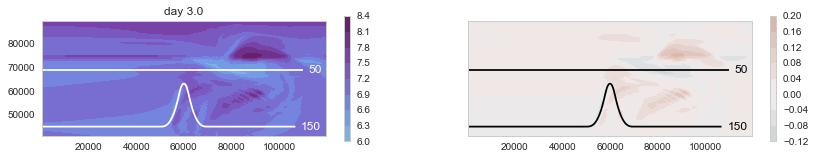

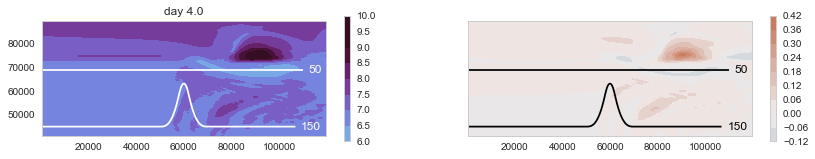

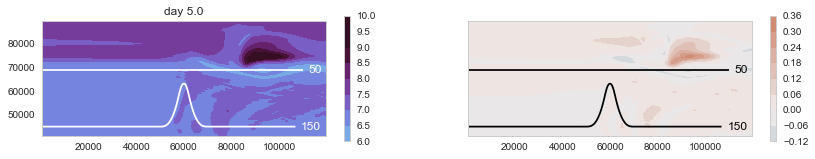

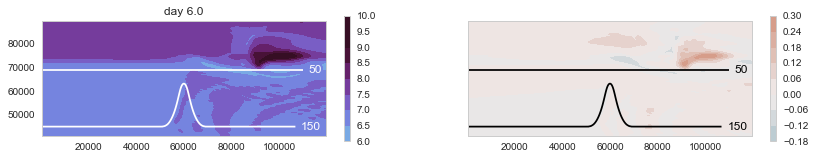

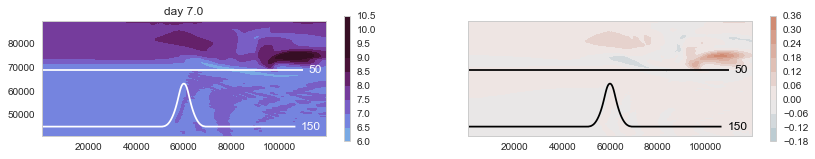

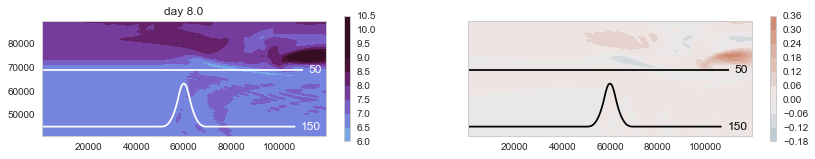

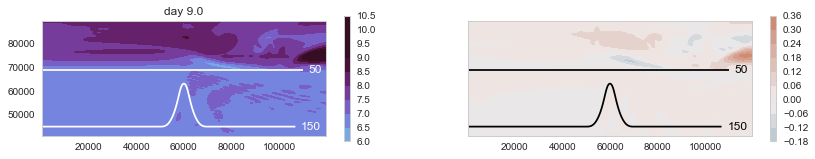

In [51]:
grid_file = '/data/kramosmu/results/TracerExperiments/UPWELLING_8TR/05_Ast02/gridGlob.nc'
grid_fileNoC = '/data/kramosmu/results/TracerExperiments/UPWELLING_8TR/06_Ast02_No_Cny/gridGlob.nc'
state_file = '/data/kramosmu/results/TracerExperiments/UPWELLING_8TR/05_Ast02/stateGlob.nc' 
ptracers_file = '/data/kramosmu/results/TracerExperiments/UPWELLING_8TR/05_Ast02/ptracersGlob.nc'
ptracers_fileNoC = '/data/kramosmu/results/TracerExperiments/UPWELLING_8TR/06_Ast02_No_Cny/ptracersGlob.nc'

with Dataset(grid_file, 'r') as nbl:
    Z = nbl.variables['RC'][:]
    X = nbl.variables['X'][:]
    Y = nbl.variables['Y'][:]
    Depth = nbl.variables['Depth'][:]

trac = 'Tr08'
zslice = slice(0,4)
yslice = slice(150,359)
xslice = slice(0,360)

for tt in range(0,19,2):
    tr, trNoC, tr0NoC = getTracers(ptracers_file, ptracers_fileNoC,trac, xslice, yslice, zslice, tt)
    ax0, ax1 = plotSurf(xslice, yslice, tr, trNoC, tr0NoC, tt, vmax=9, vmin=5)


### Barkley02 - Methane

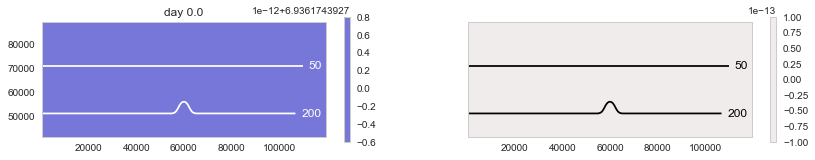

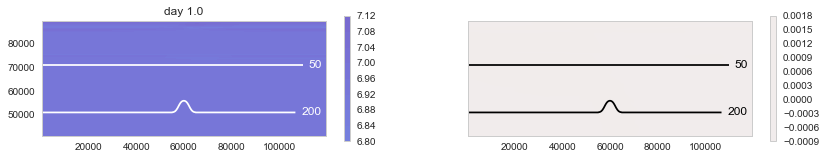

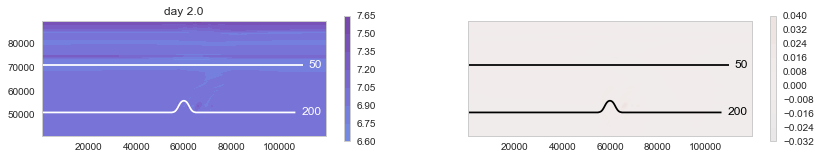

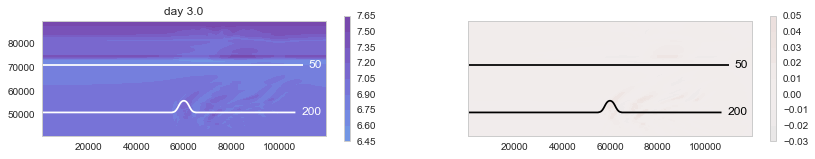

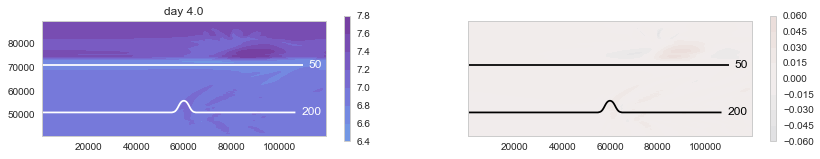

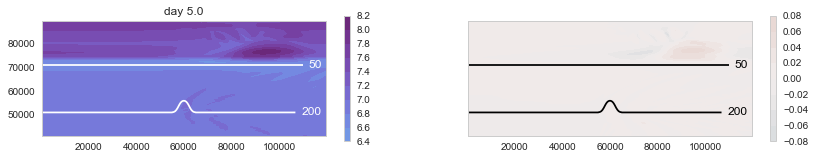

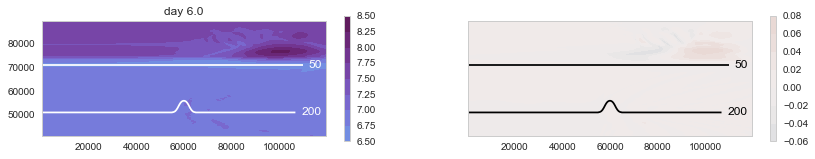

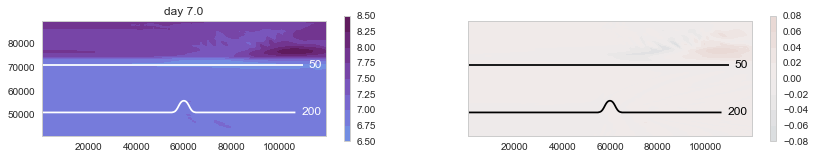

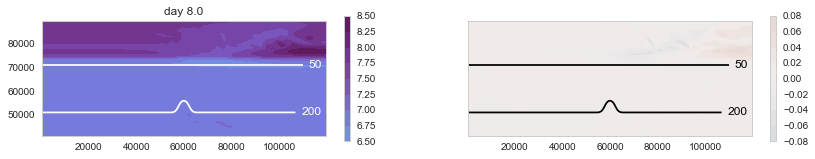

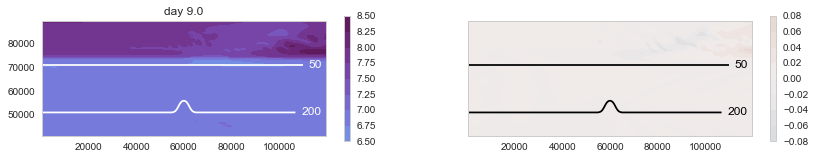

In [52]:
grid_file = '/data/kramosmu/results/TracerExperiments/UPWELLING_8TR/07_Bar02/gridGlob.nc'
grid_fileNoC = '/data/kramosmu/results/TracerExperiments/UPWELLING_8TR/08_Bar02_No_Cny/gridGlob.nc'
state_file = '/data/kramosmu/results/TracerExperiments/UPWELLING_8TR/07_Bar02/stateGlob.nc' 
ptracers_file = '/data/kramosmu/results/TracerExperiments/UPWELLING_8TR/07_Bar02/ptracersGlob.nc'
ptracers_fileNoC = '/data/kramosmu/results/TracerExperiments/UPWELLING_8TR/08_Bar02_No_Cny/ptracersGlob.nc'

with Dataset(grid_file, 'r') as nbl:
    Z = nbl.variables['RC'][:]
    X = nbl.variables['X'][:]
    Y = nbl.variables['Y'][:]
    Depth = nbl.variables['Depth'][:]
    
trac = 'Tr08'
zslice = slice(0,4)
yslice = slice(150,359)
xslice = slice(0,360)

for tt in range(0,19,2):
    tr, trNoC, tr0NoC = getTracers(ptracers_file, ptracers_fileNoC,trac, xslice, yslice, zslice, tt)
    ax0, ax1 = plotSurf(xslice, yslice, tr, trNoC, tr0NoC, tt, vmax=9, vmin=5, shelf_dep=200.0)


### Astoria02 - Silicate

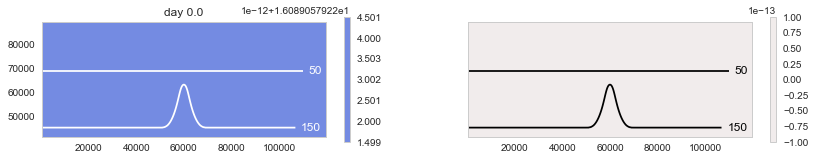

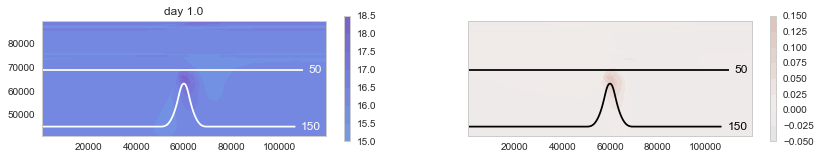

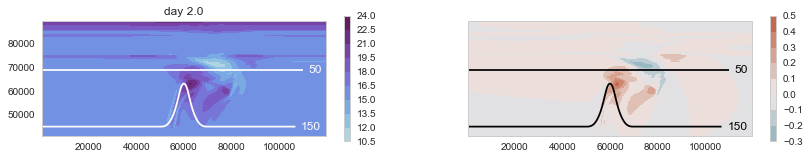

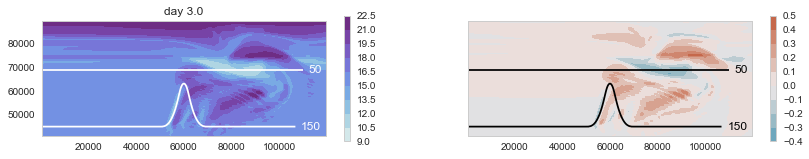

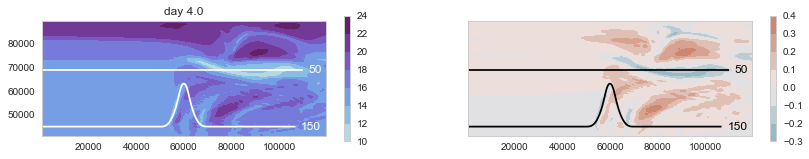

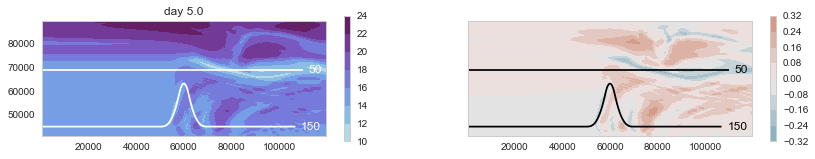

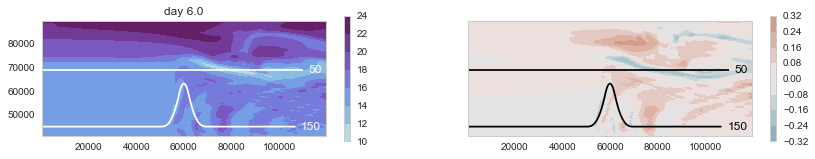

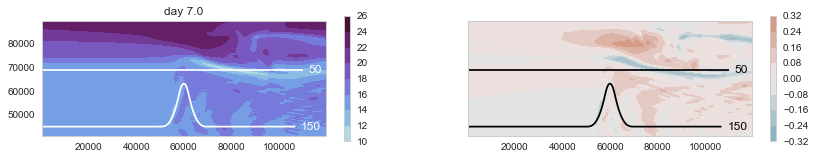

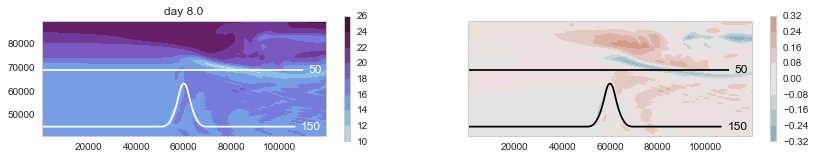

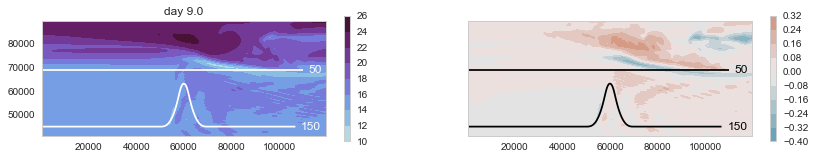

In [54]:
grid_file = '/data/kramosmu/results/TracerExperiments/UPWELLING_8TR/05_Ast02/gridGlob.nc'
grid_fileNoC = '/data/kramosmu/results/TracerExperiments/UPWELLING_8TR/06_Ast02_No_Cny/gridGlob.nc'
state_file = '/data/kramosmu/results/TracerExperiments/UPWELLING_8TR/05_Ast02/stateGlob.nc' 
ptracers_file = '/data/kramosmu/results/TracerExperiments/UPWELLING_8TR/05_Ast02/ptracersGlob.nc'
ptracers_fileNoC = '/data/kramosmu/results/TracerExperiments/UPWELLING_8TR/06_Ast02_No_Cny/ptracersGlob.nc'

with Dataset(grid_file, 'r') as nbl:
    Z = nbl.variables['RC'][:]
    X = nbl.variables['X'][:]
    Y = nbl.variables['Y'][:]
    Depth = nbl.variables['Depth'][:]

trac = 'Tr05'
zslice = slice(0,4)
yslice = slice(150,359)
xslice = slice(0,360)

for tt in range(0,19,2):
    tr, trNoC, tr0NoC = getTracers(ptracers_file, ptracers_fileNoC,trac, xslice, yslice, zslice, tt)
    ax0, ax1 = plotSurf(xslice, yslice, tr, trNoC, tr0NoC, tt, vmax=26, vmin=9)


### Barkley02 - Silicate

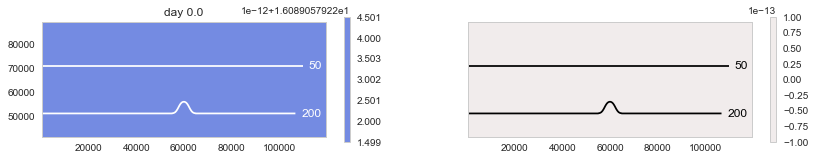

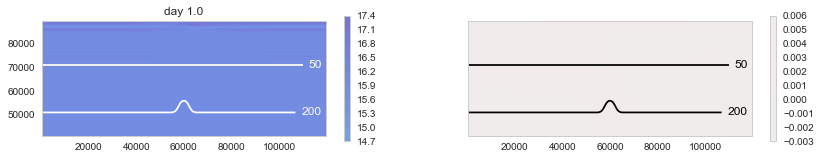

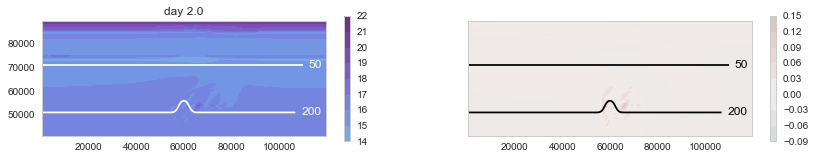

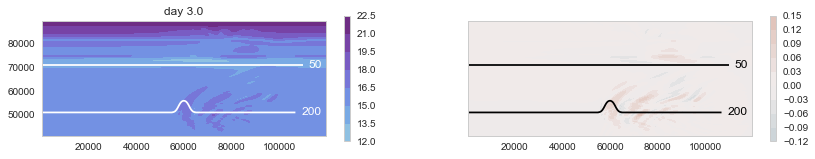

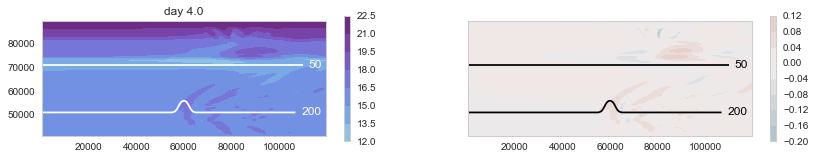

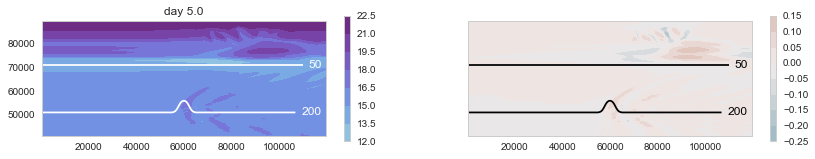

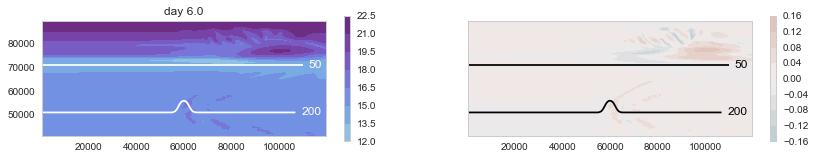

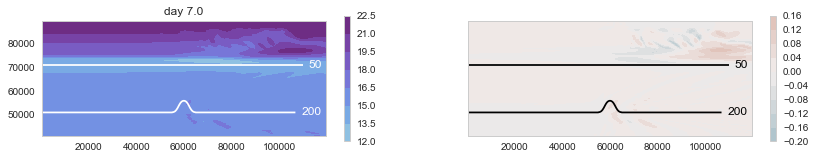

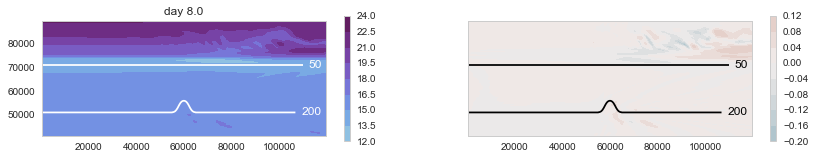

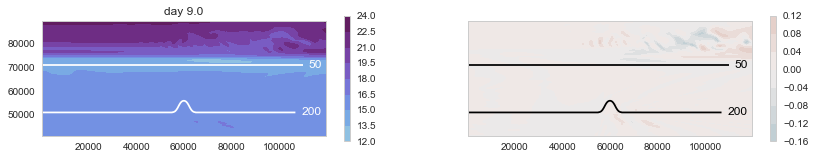

In [55]:
grid_file = '/data/kramosmu/results/TracerExperiments/UPWELLING_8TR/07_Bar02/gridGlob.nc'
grid_fileNoC = '/data/kramosmu/results/TracerExperiments/UPWELLING_8TR/08_Bar02_No_Cny/gridGlob.nc'
state_file = '/data/kramosmu/results/TracerExperiments/UPWELLING_8TR/07_Bar02/stateGlob.nc' 
ptracers_file = '/data/kramosmu/results/TracerExperiments/UPWELLING_8TR/07_Bar02/ptracersGlob.nc'
ptracers_fileNoC = '/data/kramosmu/results/TracerExperiments/UPWELLING_8TR/08_Bar02_No_Cny/ptracersGlob.nc'

with Dataset(grid_file, 'r') as nbl:
    Z = nbl.variables['RC'][:]
    X = nbl.variables['X'][:]
    Y = nbl.variables['Y'][:]
    Depth = nbl.variables['Depth'][:]
    
trac = 'Tr05'
zslice = slice(0,4)
yslice = slice(150,359)
xslice = slice(0,360)

for tt in range(0,19,2):
    tr, trNoC, tr0NoC = getTracers(ptracers_file, ptracers_fileNoC,trac, xslice, yslice, zslice, tt)
    ax0, ax1 = plotSurf(xslice, yslice, tr, trNoC, tr0NoC, tt, vmax=26, vmin=9, shelf_dep=200.0)
